本笔记包括KMeans类的实现和DBSCAN类的实现

# KMean实现

KMean算法思路：

__Require__
1. 载入数据和参数
2. 随机簇中心点

__Algorithm__
1. 根据距离的远近，给所有数据分类
2. 计算每簇的质心
3. 重复上述步骤

In [63]:
import numpy as np

class KMeans:
    def __init__(self, data, num_clusters):
        self.data = data
        self.num_clusters = num_clusters

    def train(self, num_iters):
        # 1.随机选择质心
        centroids = self.centroids_init(self.data, self.num_clusters)
        # 2.开始训练
        num_samples = self.data.shape[0]
        closest_centroids_ids = np.empty((num_samples,1))
        for _ in range(num_iters):
            # 3.样本点归属划分
            closest_centroids_ids = self.find_closest(self.data, centroids)
            # 4.中心点迭代过程
            centroids = self.centroids_compute(self.data, closest_centroids_ids, self.num_clusters)
        return centroids,closest_centroids_ids
    
    def centroids_init(self,data, num_clusters):
        num_samples = data.shape[0]
        randomID = np.random.permutation(num_samples)
        cenrtroids = data[randomID[:num_clusters],:]
        return cenrtroids

    def find_closest(self,data,centroids):
        closest_ids = []
        for sample in data:
            distances = []
            for cen in centroids:
                dis = sample - cen
                dis = dis*dis
                dis = np.sum(dis)
                dis = np.sqrt(dis)
                distances.append(dis)
            closest_ids.append(distances.index(min(distances)))
        closest_centroids_ids = np.array(closest_ids)
        return closest_centroids_ids
    
    def centroids_compute(self,data,closest_centroids_ids, num_clusters):
        # 4,5'
        num_features = data.shape[1]
        centroids = np.zeros((num_clusters,num_features))
        for centroids_id in range(num_clusters):
            points = data[closest_centroids_ids==centroids_id]
            centroids[centroids_id] = np.mean(points,axis=0)
        return centroids

# 使用sklearn中鸢尾花数据集进行实验

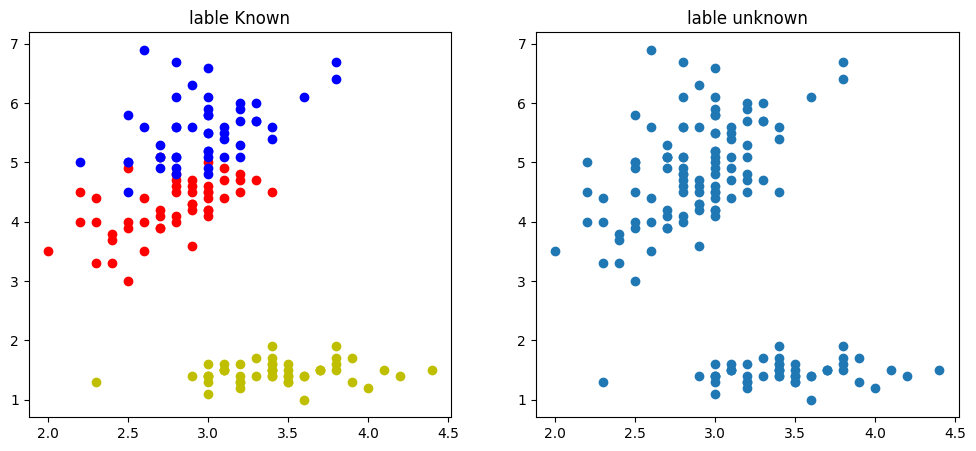

In [64]:
# 先导入并查看数据(为了方便画图，使用前两种特征进行训练)
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
data = load_iris()
label = data.target
Data = data.data
data = np.array(Data)
Data = data
data = data[:,1:3]
label = np.array(label)

x_axis = 'feature1'
y_axis = 'feature2'
feature1 = data[:,0].flatten()
feature2 = data[:,1].flatten()

plt.figure(figsize=(12,5))
plt.subplot(121)
color = ['y','r','b']
for i in range(3):
    plt.scatter(feature1[label==i],feature2[label==i],color=color[i])
plt.title('lable Known')
plt.subplot(122)
plt.scatter(feature1,feature2)
plt.title('lable unknown')
plt.show() 

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

num_clusters = data.shape[1]
x_train = data

num_iter = 1000
num_clusters = 3

model = KMeans(Data,num_clusters)

centroids,closet_centroids_ids = model.train(num_iters=num_iter)

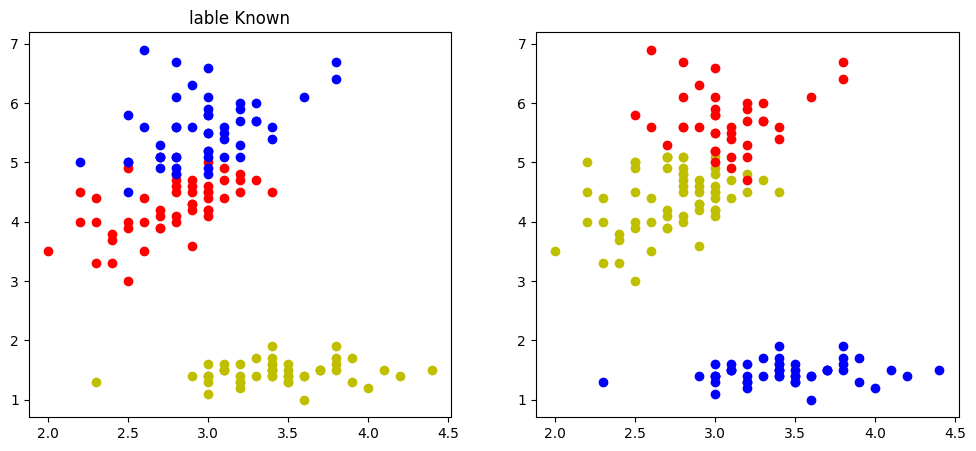

In [91]:
plt.figure(figsize=(12,5))
plt.subplot(121)
color = ['y','r','b','m']
for i in range(num_clusters):
    plt.scatter(feature1[label==i],feature2[label==i],color=color[i])
plt.title('lable Known')
plt.subplot(122)
# plt.scatter(feature1,feature2)
# plt.title('lable unknown')
for i in range(num_clusters):
    plt.scatter(feature1[closet_centroids_ids==i],feature2[closet_centroids_ids==i],color=color[i])
plt.show() 

## KMeans的评估
__轮廓系数__

$$s(i)=\cfrac{b(i)-a(i)}{max(a(i),b(i))}$$
其中，$b(i)$为样本点到其他簇的点的平均距离，$a(i)$为样本点到本簇点的平均距离

$s(i)$越接近1，则说明分类的越准确；越接近-1，说明分类的越不准确；接近0，说明该样本点在两簇的边界上

# DBSCAN算法实验

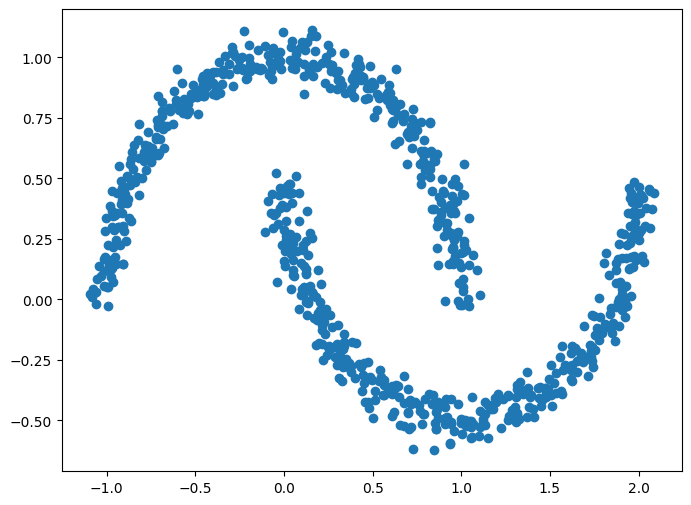

In [112]:
# 构造数据
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
X,y = make_moons(n_samples=800, noise = 0.05, random_state=42)
plt.figure(figsize=(8,6))
plt.scatter(X[:,0],X[:,1])
plt.show()

In [113]:
class DBSCAN:
    def __init__(self, eps, min_samples):
        self.eps = eps                      # 邻域半径参数
        self.min_samples = min_samples      # 密度参数
        self.labels = None                  
    
    def distance(self, xa, xb):
        # 计算两点的欧氏距离
        return np.sqrt(np.sum((xa - xb) ** 2))
    
    def region_query(self, X, point_idx):
        # 找到邻域内的点的索引
        neighbors = []
        for i in range(len(X)):
            if self.distance(X[point_idx], X[i]) <= self.eps:
                neighbors.append(i)
        return neighbors
    
    def expand_cluster(self, X, cluster_id, point_idx, neighbors):
        # 根据给定点及其邻域进行拓展
        self.labels[point_idx] = cluster_id
        i = 0
        while i < len(neighbors):
            neighbor = neighbors[i]
            if self.labels[neighbor] == -1:
                self.labels[neighbor] = cluster_id
            elif self.labels[neighbor] == 0:
                self.labels[neighbor] = cluster_id
                point_neighbors = self.region_query(X, neighbor)
                if len(point_neighbors) >= self.min_samples:
                    neighbors += point_neighbors
            i += 1
    
    def fit(self, X):
        # 训练
        n = len(X)
        self.labels = np.zeros(n)
        cluster_id = 1
        for i in range(n):
            if self.labels[i] != 0:
                continue
            neighbors = self.region_query(X, i)
            if len(neighbors) < self.min_samples:
                self.labels[i] = -1
            else:
                self.expand_cluster(X, cluster_id, i, neighbors)
                cluster_id += 1
        # 返回聚类标签
        return self.labels

In [114]:
model = DBSCAN(0.2,5)
label = model.fit(X)

[1. 2.]


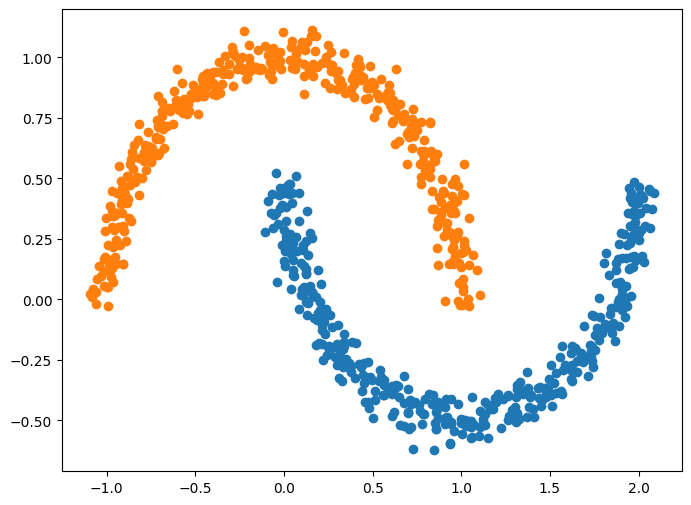

In [123]:
y = np.unique(label)
plt.figure(figsize =(8,6))
plt.scatter(X[label==1][:,0],X[label==1][:,1])
plt.scatter(X[label==2][:,0],X[label==2][:,1])
plt.show()

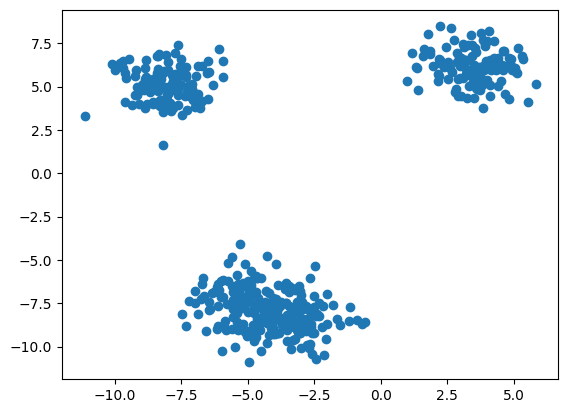

In [138]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=500, n_features=2,centers=4,random_state=19)
plt.scatter(X[:,0],X[:,1])
plt.show()